In [ ]:
"""
作者：杨佳瑶
学号：1120193572
班级：07111908
日期：2023/5/29
GitHub：https://github.com/CCChengYi/data-mining
"""

In [1]:
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize #Used to extract words from documents
from nltk.stem import WordNetLemmatizer #Used to lemmatize words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans

import sys
import re
import string
from time import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categories = [
 'alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc'
]

print("Loading 20 newsgroups dataset for categories:")
print(categories)

Loading 20 newsgroups dataset for categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


## 数据预览

In [3]:
df = fetch_20newsgroups(subset='all', categories=categories, 
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

In [4]:
labels = df.target
true_k = len(np.unique(labels)) ## This should be 3 in this example
print(true_k)

20


In [5]:
df.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

可以看到，新闻数据共有20个分类

对各类别的数量进行可视化处理

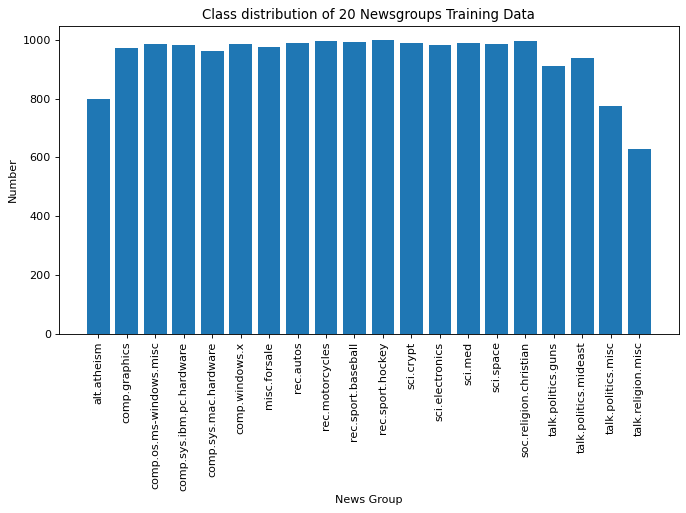

In [6]:
# 对各类别的数量进行可视化
targets, frequency = np.unique(df.target, return_counts=True)
targets_str = np.array(df.target_names)
fig = plt.figure(figsize=(10, 5), dpi=80, facecolor='w', edgecolor='k')
plt.bar(targets_str, frequency)
plt.xticks(rotation=90)
plt.title('Class distribution of 20 Newsgroups Training Data')
plt.xlabel('News Group')
plt.ylabel('Number')
plt.show()


## 数据预处理

在聚类之前先对数据进行预处理，去除停用词、数字、符号，并将大写字母转换成小写

In [7]:
dataset_df = pd.DataFrame({'data': df.data, 'target': df.target})
# 使用正则表达式进行数据处理
def alphanumeric(x):
    return re.sub(r"""\w*\d\w*""", ' ', x)
def punc_lower(x):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
dataset_df['data'] = dataset_df.data.map(alphanumeric).map(punc_lower)


展示部分数据

In [8]:
dataset_df.data

0        \nmorgan and guzman will have era s   run high...
1        well  i just got my centris   yesterday   it t...
2        archive name  cryptography faq  \nlast modifie...
3        to the best of my knowledge there aren t any p...
4        \n\ni think that domestication will change beh...
                               ...                        
18841    \nwhy are circuit boards green   the material ...
18842    \n\nanybody who drove into somebody like that ...
18843    we were told that the resolution on the   coul...
18844    cad setup for sale \n\n  local bus motherboard...
18845    \n\n \nsame engine  different state of tune  l...
Name: data, Length: 18846, dtype: object

## 特征向量化

In [9]:
texts = df.data
target = df.target
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(texts)

## 使用K-means聚类

使用K-means聚类方法，设置k为20，将数据聚成20类

In [10]:
number_of_clusters = 20
model = KMeans(n_clusters=number_of_clusters,
               init='k-means++',
               max_iter=100,
               n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [11]:
KMeans(max_iter=100, n_clusters=20, n_init=1)

KMeans(max_iter=100, n_clusters=20, n_init=1)

查看聚类后每个类别中的关键词，每个类别展示20个

In [12]:
dict_list = []
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(number_of_clusters):
    dict = {}
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind])
        dict[terms[ind]] = model.cluster_centers_[i][ind]
    dict_list.append(dict)


Cluster 0:
 automaticaly
 s10
 chev
 stop
 pickup
 steering
 mechanical
 1984
 turning
 wheel
 signal
 turn
 cause
 subject
 left
 says
 problem
 does
 dilation
 dilating
Cluster 1:
 jvc
 disc
 player
 cord
 programmable
 hz
 converter
 remote
 dc
 unit
 discwasher
 7942
 harrij
 nicad
 rechargeable
 include
 compulink
 car
 headphones
 271
Cluster 2:
 _finally_
 thankyouthankyouthankyou
 golfing
 dweeb
 whatta
 started
 skating
 muller
 damphousse
 skate
 hextall
 _is_
 habs
 suck
 marks
 deserves
 finds
 roy
 quebec
 tied
Cluster 3:
 drives
 cached
 hard
 unclear
 cache
 postings
 concerning
 separate
 controller
 reading
 clear
 drive
 thing
 thanks
 new
 like
 diligent
 diligence
 dimension
 dilemna
Cluster 4:
 heaven
 father
 heart
 grading
 bible
 test
 love
 children
 perspective
 god
 concept
 pass
 final
 decipline
 considerd
 hell
 childhoods
 looks
 jesus
 interesting
Cluster 5:
 icon
 forever
 manager
 knows
 advance
 hi
 change
 mean
 program
 thanks
 dimensional
 dilmore


D:\Anaconda3\envs\data\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 类别预测 

根据模型来划分测试集的类别

In [13]:
# 对单个词进行类别划分
X = vectorizer.transform([texts[400]])
cluster = model.predict(X)[0]
print("这个词属于第{0}类".format(cluster))

这个词属于第11类


Text(0.5, 0, 'Target')

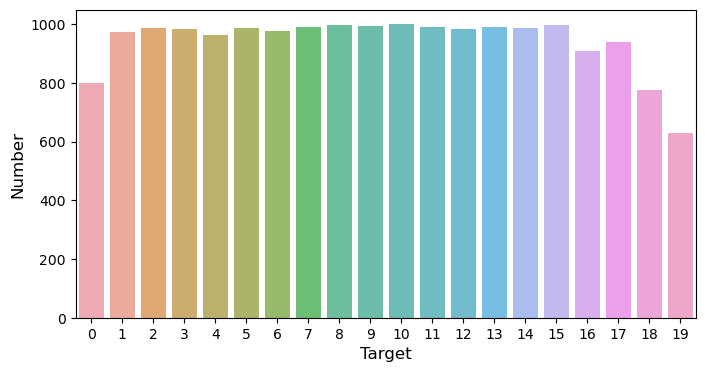

In [14]:
# 测试集预测结果可视化
count_target = dataset_df['target'].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=count_target.index, y=count_target.values, alpha=0.8)
plt.ylabel('Number', fontsize=12)
plt.xlabel('Target', fontsize=12)


## 可视化

In [15]:
from wordcloud import WordCloud


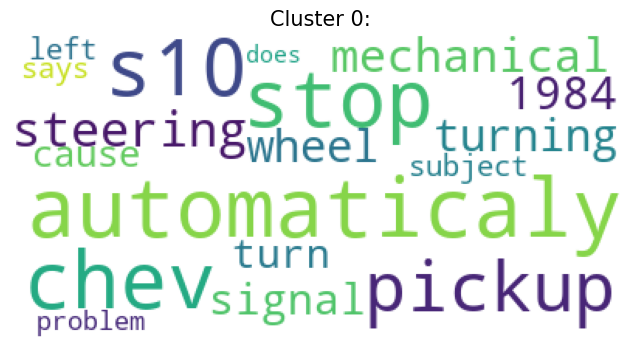

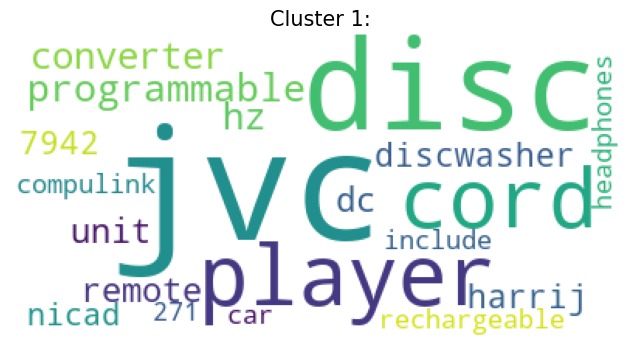

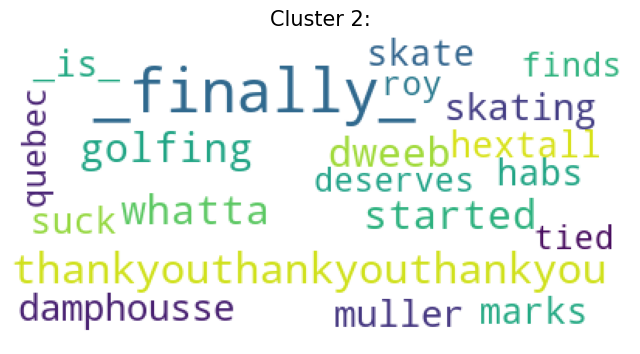

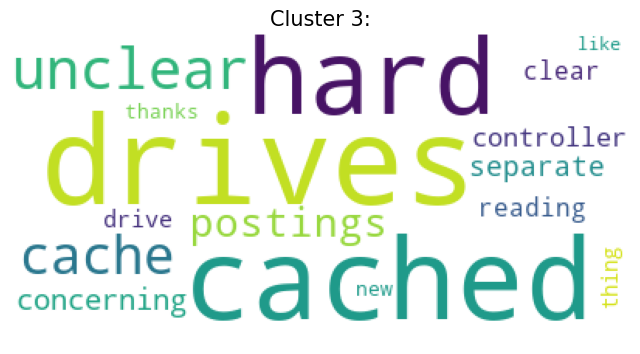

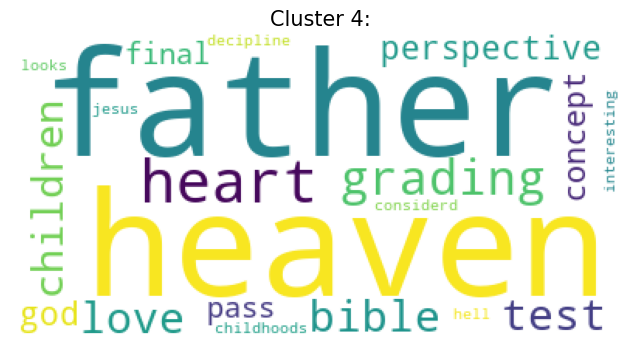

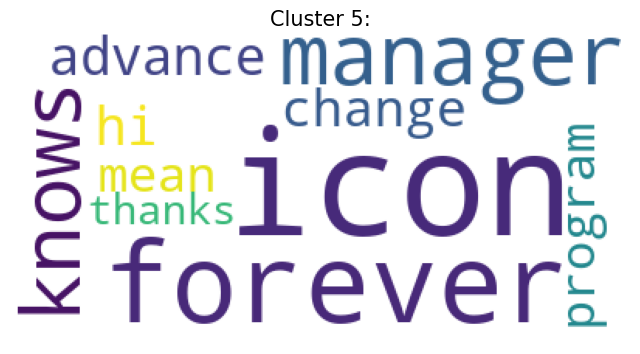

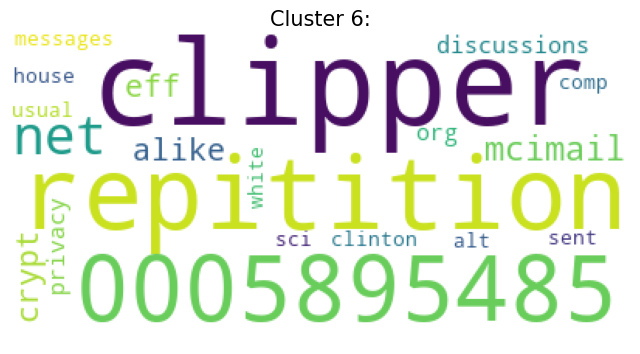

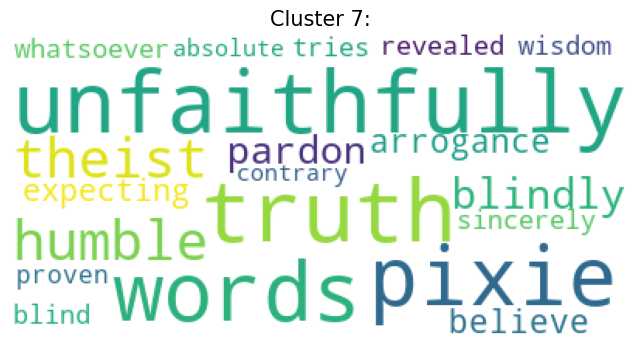

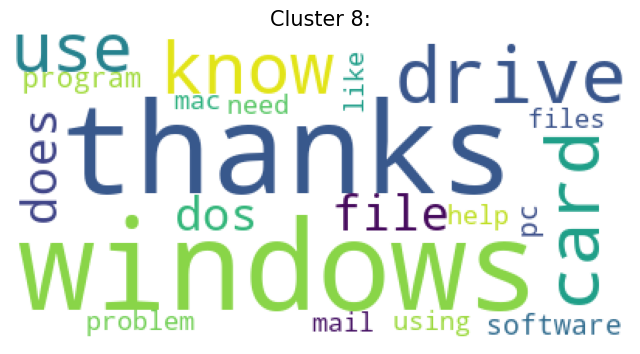

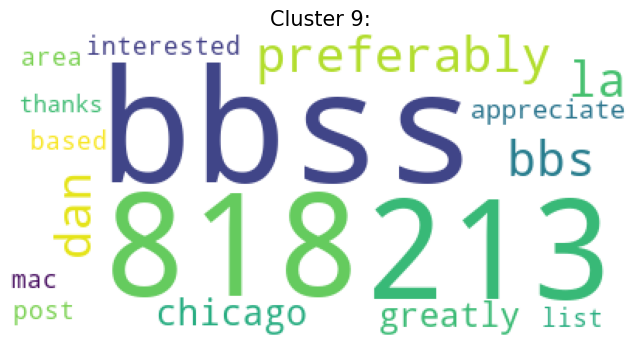

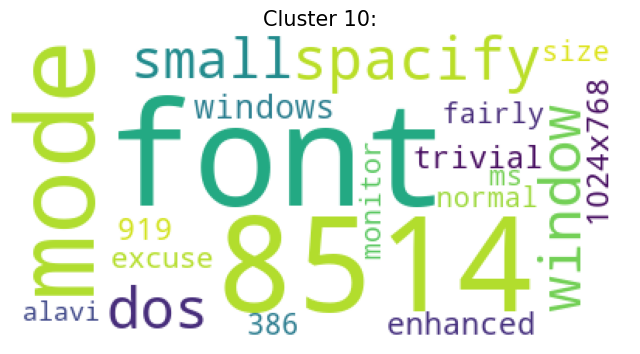

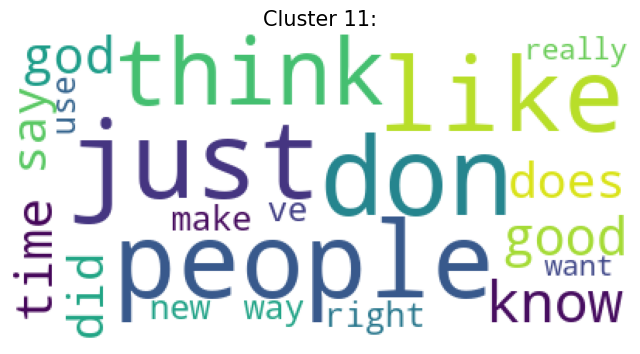

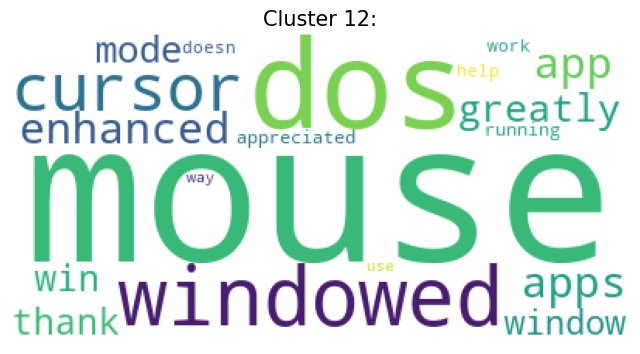

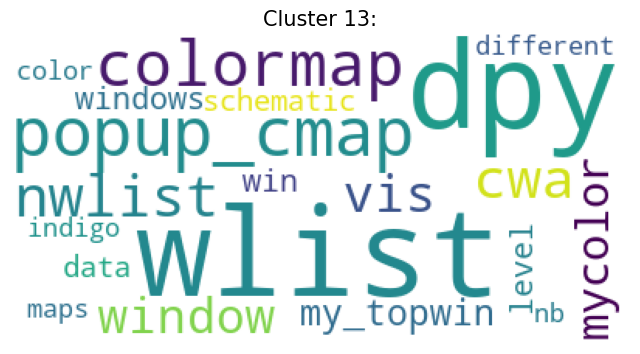

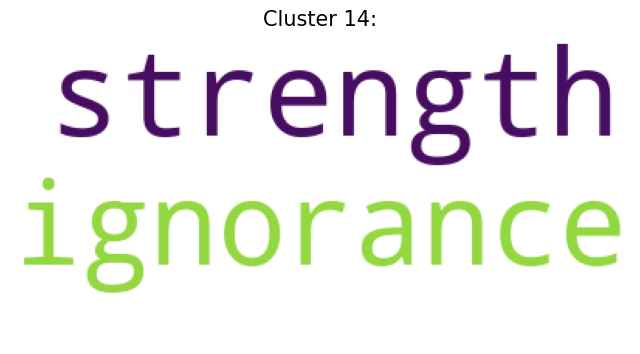

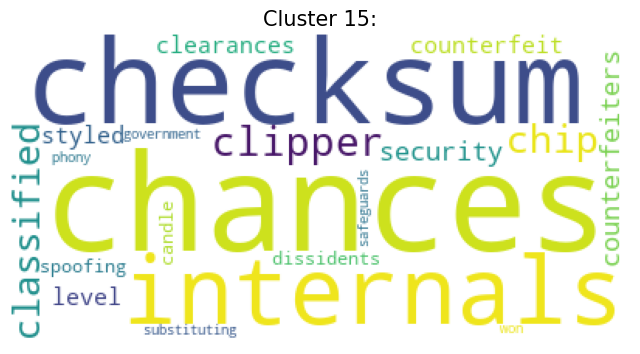

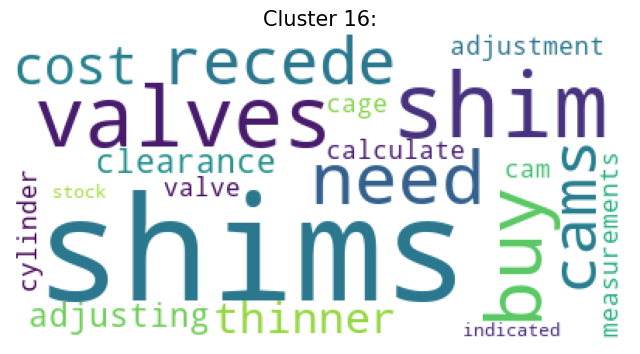

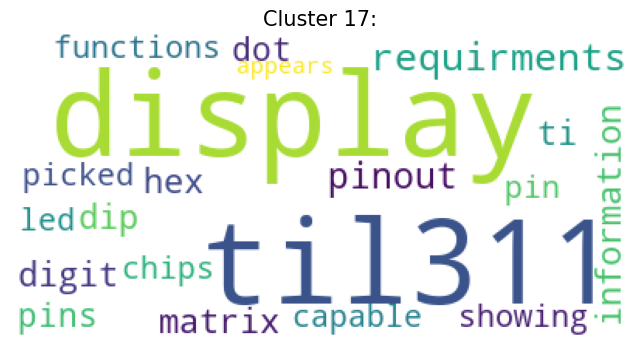

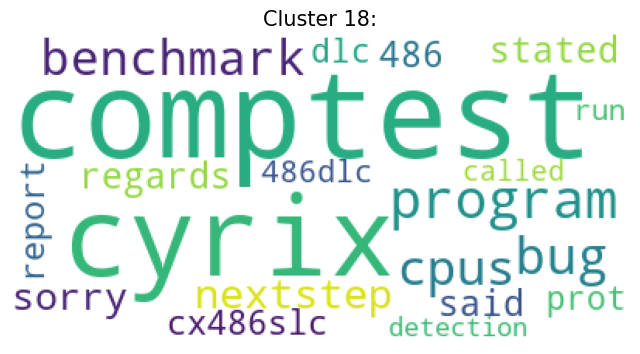

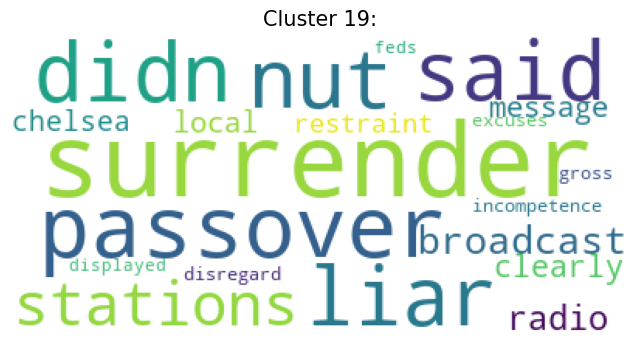

In [16]:
for i in range(20):
    wordcloud = WordCloud(background_color="white", relative_scaling=0.5,
                          normalize_plurals=False).generate_from_frequencies(dict_list[i])
    fig = plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.title('Cluster %d:' % i, fontsize='15')
    plt.imshow(wordcloud)
    plt.show()
